# **Spherical Cluster Comparison**

## **Importing the libraries**

**Note:** Please make sure you have installed the sklearn_extra library before running the below cell. If you have not installed the library, please run the below code to install the library:

!pip install scikit-learn-extra

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')    # To get rid of warning messages

from sklearn import datasets         # To create dummy dataset

from sklearn.cluster import KMeans   

from sklearn_extra.cluster import KMedoids

from sklearn.mixture import GaussianMixture

from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import DBSCAN

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format        

# Update default background style of plots
sns.set_style(style='darkgrid')

## **Creating the dummy dataset**

In [2]:
np.random.seed(1)   # Setting the seed to get reproducible results

conc_circles = datasets.make_circles(n_samples = 2000, factor = .5, noise = .05)

In [3]:
X, y = conc_circles         # Separating the features and the labels

In [4]:
df = pd.DataFrame(X)

df.columns = ['X1', 'X2']

df['Y'] = y

df

,X1,X2,Y
0,-0.55,-0.90,0
1,-0.19,-0.42,1
2,-0.13,0.54,1
3,-0.18,0.45,1
4,0.13,0.51,1
...,...,...,...
1995,0.13,-0.51,1
1996,0.49,0.33,1
1997,0.59,-0.28,1
1998,0.18,1.02,0


## **Visualizing the data**

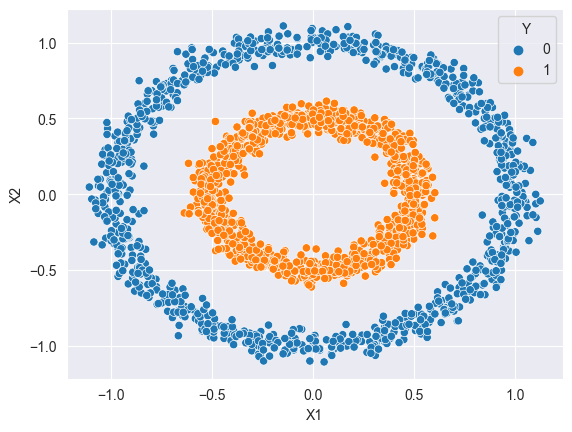

In [5]:
# Scatter plot of original lables
sns.scatterplot(x = 'X1', y = 'X2', data = df, hue = 'Y')

plt.show()

The above scatter plot shows **two concentric circles, each belonging to a different class**. The **objective is to visualize the clusters we get from different clustering algorithms by using the features X1 and X2,** and see how well each clustering algorithm can perform in terms of identifying the underlying pattern of concentric circles.

## **Scaling the data**

In [6]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

## **K-Means**

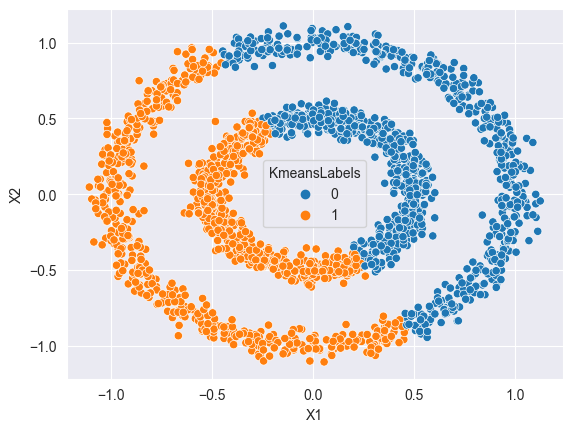

In [7]:
kmeans = KMeans(n_clusters = 2, random_state = 12)

kmeans.fit(X)

df['KmeansLabels'] = kmeans.predict(X)

sns.scatterplot(x = 'X1', y = 'X2', data = df, hue = 'KmeansLabels')

plt.show()

### **Comments**

- The K-means clustering algorithm is not able to identify the original clusters in the data.

## **K-Medoids**

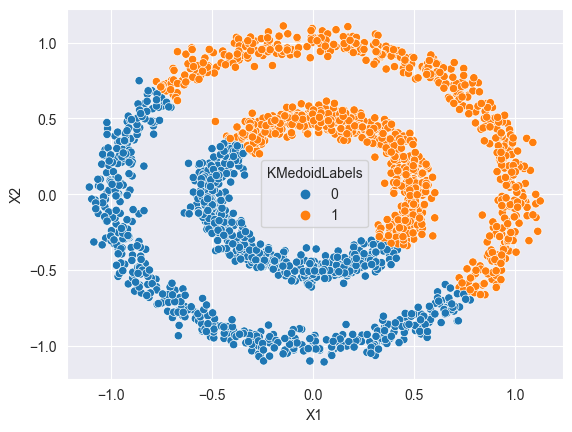

In [8]:
kmedo = KMedoids(n_clusters = 2, random_state = 12)

kmedo.fit(X)

df['KMedoidLabels'] = kmedo.predict(X)

sns.scatterplot(x = 'X1', y = 'X2', data = df, hue = 'KMedoidLabels')

plt.show()

### **Comments**
 - We see similar results as K-Means for K-Medoids.

## **Gaussian Mixture Model**

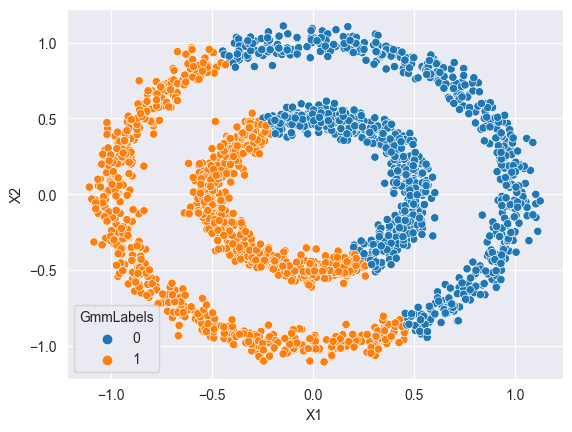

In [9]:
gmm = GaussianMixture(n_components = 2, random_state = 12)

gmm.fit(X) 

df['GmmLabels'] = gmm.predict(X)

sns.scatterplot(x = 'X1', y = 'X2', data = df, hue = 'GmmLabels')

plt.show()

### **Comments**
- Gaussian Mixture Model is also not able to identify the underlying concentric circles in the data.

## **Hierarchical - Agglomerative**

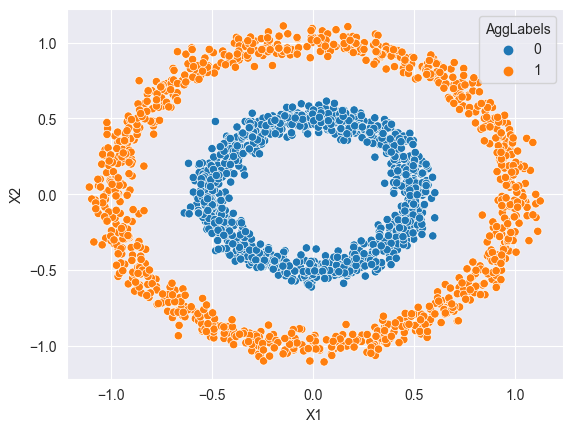

In [10]:
aglc = AgglomerativeClustering(n_clusters = 2, linkage = 'single')

df['AggLabels'] = aglc.fit_predict(X)

sns.scatterplot(x = 'X1', y = 'X2', data = df, hue = 'AggLabels')

plt.show()

### **Comments**

 - Except for the opposite labeling of clusters, Agglomerative Clustering, with default hyperparameters and 2 as the number of clusters, has been able to identify the desired clusters.

## **DBSCAN**

- Now let us look at the DBSCAN algorithm

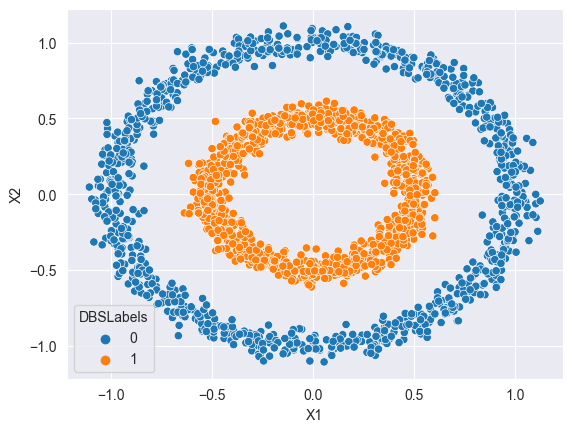

In [11]:
dbs = DBSCAN(eps = 0.3)

df['DBSLabels'] = dbs.fit_predict(X)

sns.scatterplot(x = 'X1', y = 'X2', data = df, hue = 'DBSLabels')

plt.show()

### **Comments**

- DBSCAN has correctly identified the intended clusters in the dataset.
- Note that, based on the value of the hyperparameter eps, the results might vary for the DBSCAN algorithm. For a too large value, there might be just one cluster that is identified by the algorithm (try with values 0.7, 1).